# Get GPU Information

Get GPU info to check that we are using the correct hardware

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Jun 14 17:05:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Converting files from dcim to jpg


The following lines are used to dowload the dcim images of the dataset, convert them to jpg format and scale them to a size of 512 pixels in width keeping the aspect ratio of the original image

In [ ]:
!pip install kaggle

'\n!pip install kaggle\n'

In [2]:
# Mounting GDrive to load the images
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load images from Kaggle using Kaggle.json
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

'\n#Load images from Kaggle using Kaggle.json\nfrom google.colab import files\n\nuploaded = files.upload()\n\nfor fn in uploaded.keys():\n  print(\'User uploaded file "{name}" with length {length} bytes\'.format(\n      name=fn, length=len(uploaded[fn])))\n\n# Then move kaggle.json into the folder where the API expects to find it.\n!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json\n'

In [ ]:
# Dowload Kaggle images
!kaggle competitions download -c edem-mda-2022-23-data-project-4

'\n# Dowload Kaggle images\n!kaggle competitions download -c edem-mda-2022-23-data-project-4\n'

In [ ]:
!unzip edem-mda-2022-23-data-project-4.zip

'\n!unzip edem-mda-2022-23-data-project-4.zip\n'

In [ ]:
!pip install pydicom
!pip install Pillow

'\n!pip install pydicom\n!pip install Pillow\n'

In [ ]:
import os
import shutil
import pandas as pd
import pydicom
from PIL import Image
import numpy as np


# Create train and test directories
train_folder = "/content/drive/My Drive/DP4_final/train"
test_folder = "/content/drive/My Drive/DP4_final/test"

if not os.path.exists(train_folder):
    os.makedirs(train_folder)
if not os.path.exists(test_folder):
    os.makedirs(test_folder)

# Function to convert .dcm files to .jpg
def convert_dcm_to_jpg(file_path, output_folder, processed_files, total_files):
    # Read the .dcm file
    ds = pydicom.dcmread(file_path)
    img = ds.pixel_array
    # Convert to 8-bit (from 16-bit), which is what PIL Image expects
    img = (img / img.max()) * 255  # This line scales pixel values to 0-255 range
    img = img.astype(np.uint8)
    # Convert to PIL Image
    img = Image.fromarray(img)
    # Calculate the height with respect to the new width
    width_percent = (512/float(img.size[0]))
    new_height = int((float(img.size[1])*float(width_percent)))
    img = img.resize((512, new_height), Image.ANTIALIAS)
    # Save as .jpg in the output folder
    new_filename = os.path.splitext(os.path.basename(file_path))[0] + '.jpg'
    new_file_path = os.path.join(output_folder, new_filename)
    img.save(new_file_path)

    # Print the progress
    print(f'Successfully converted image {processed_files} of {total_files} and saved as {new_file_path}')


# Load the train CSV file
df = pd.read_csv('/content/train.csv')


# Count total number of .dcm files
total_files = len(df) + len(os.listdir('/content/train'))

# Processed files count
processed_files = 0

# Convert train images
for index, row in df.iterrows():
    # Get the image filename and class
    image_name = str(row[0]) + '.dcm'  # add the .dcm extension
    class_name = str(row[1])

    # Create a new folder for each class in the DP4_final/train folder if it doesn't exist
    class_folder = os.path.join(train_folder, class_name)
    if not os.path.exists(class_folder):
        os.makedirs(class_folder)

    # Check if file is in train folder
    if os.path.exists(f'/content/train/{image_name}'):
        file_path = f'/content/train/{image_name}'
    else:
        print(f'File {image_name} not found in train folder. Skipping...')
        continue

    processed_files += 1
    convert_dcm_to_jpg(file_path, class_folder, processed_files, total_files)

# Count total number of .dcm files
total_files = len(df) + len(os.listdir('/content/test'))

# Processed files count
processed_files = 0

# Convert test images
for filename in os.listdir('/content/test'):
    if filename.endswith(".dcm"):
        file_path = os.path.join('/content/test', filename)
        processed_files += 1
        convert_dcm_to_jpg(file_path, test_folder, processed_files, total_files)



'\nimport os\nimport shutil\nimport pandas as pd\nimport pydicom\nfrom PIL import Image\nimport numpy as np\n\n\n# Create train and test directories\ntrain_folder = "/content/drive/My Drive/DP4_final/train"\ntest_folder = "/content/drive/My Drive/DP4_final/test"\n\nif not os.path.exists(train_folder):\n    os.makedirs(train_folder)\nif not os.path.exists(test_folder):\n    os.makedirs(test_folder)\n\n# Function to convert .dcm files to .jpg\ndef convert_dcm_to_jpg(file_path, output_folder, processed_files, total_files):\n    # Read the .dcm file\n    ds = pydicom.dcmread(file_path)\n    img = ds.pixel_array\n    # Convert to 8-bit (from 16-bit), which is what PIL Image expects\n    img = (img / img.max()) * 255  # This line scales pixel values to 0-255 range\n    img = img.astype(np.uint8)\n    # Convert to PIL Image\n    img = Image.fromarray(img)\n    # Calculate the height with respect to the new width\n    width_percent = (512/float(img.size[0]))\n    new_height = int((float(img.si

# Training

First we define the data that will be used for training the neural network. There are two options, we either use the dataset as it is, or we apply data augmentation of the less representative classes.

In [3]:
from fastai.vision.all import *
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import RandomOverSampler

import numpy as np
import matplotlib.pyplot as plt


# Load your data
path = "/content/drive/MyDrive/DP4_final"

# Load data
batch_size = 8
size = 256


# Define oversampling function la función de oversampling
def oversample_data(X, y):
    oversampler = RandomOverSampler(random_state=42)
    X_oversampled, y_oversampled = oversampler.fit_resample(X, y)
    return X_oversampled, y_oversampled

# Load image data
batch_size = 8
size = 256

dls = ImageDataLoaders.from_folder(
    path=path + '/train',
    train="./",
    test="../test",
    valid_pct=0.2,
    ds_tfms=aug_transforms(),
    size=size,
    batch_tfms=Normalize.from_stats(*imagenet_stats),
    item_tfms=Resize(size, method=ResizeMethod.Pad, pad_mode=PadMode.Zeros),
    bs=batch_size,
    shuffle=True
)

# Get training tags
y_train = np.array(dls.train_ds.vocab)
# Generate a matrix index of the tags
y_train_indices = np.arange(len(y_train)).reshape(-1, 1)

# Apply oversampling to the tags
_, y_train_oversampled = oversample_data(y_train_indices, y_train)


# Calculate class weights
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_oversampled), y=y_train_oversampled)
class_weights = torch.FloatTensor(class_weights).cuda()


# Create new objects using oversampled tags
oversampled_data = ImageDataLoaders.from_folder(
    path=path + '/train',
    test="../test",
    train=y_train_oversampled.flatten(),  # Utilizar las etiquetas oversampleadas
    valid_pct=0.1,
    ds_tfms=aug_transforms(),
    size=size,
    batch_tfms=Normalize.from_stats(*imagenet_stats),
    item_tfms=Resize(size, method=ResizeMethod.Pad, pad_mode=PadMode.Zeros),
    bs=batch_size,
    shuffle=True
)


In [4]:
# Show classes
dls.vocab

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '3', '4', '5', '6', '7', '8', '9']

In [10]:
train_csv = pd.read_csv('/content/drive/MyDrive/DP4_final/train.csv')

Now we plot the distribution of images per class

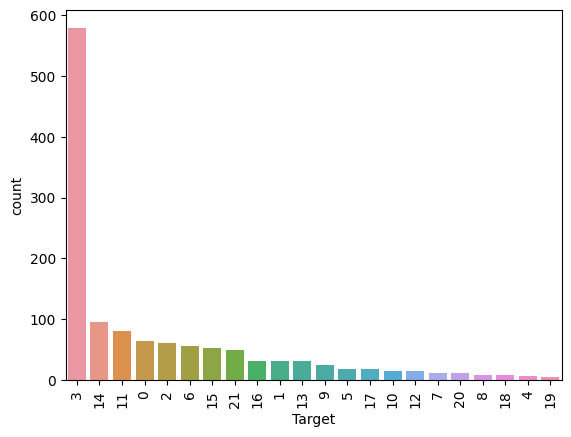

In [14]:
import seaborn as sns
sns.countplot(data = train_csv, x="Target", order=train_csv.Target.value_counts().index)
plt.xticks(rotation = 'vertical')
plt.show()

Now we do the same plot for the oversampled data

In [15]:
# Duplicate classes and append to train_csv
class_counts = train_csv['Target'].value_counts()
classes_to_duplicate = class_counts[class_counts < 100].index
for class_name in classes_to_duplicate:
    duplicated_data = train_csv[train_csv['Target'] == class_name].copy()
    train_csv = train_csv.append(duplicated_data)

updated_class_counts = train_csv['Target'].value_counts()

<ipython-input-15-5524fd187ce4>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_csv = train_csv.append(duplicated_data)
<ipython-input-15-5524fd187ce4>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_csv = train_csv.append(duplicated_data)
<ipython-input-15-5524fd187ce4>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_csv = train_csv.append(duplicated_data)
<ipython-input-15-5524fd187ce4>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_csv = train_csv.append(duplicated_data)
<ipython-input-15-5524fd187ce4>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

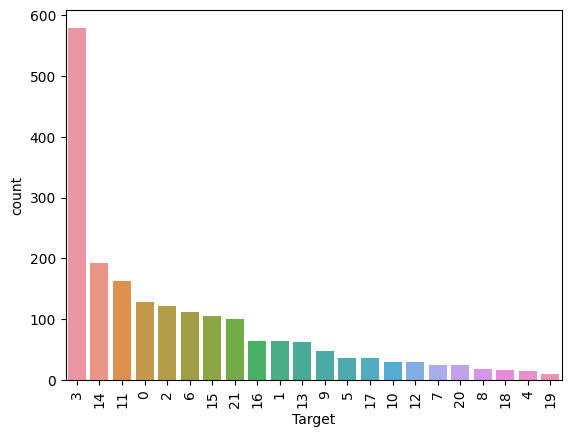

In [16]:
sns.countplot(data=train_csv, x="Target", order=train_csv.Target.value_counts().index)
plt.xticks(rotation='vertical')
plt.show()

After the data is loaded into the objects dls (for the default dataset) and oversample_data (for the data augmentation dataset) the models for the ensemble are defined and trained.

Training model 1 with architecture densenet169


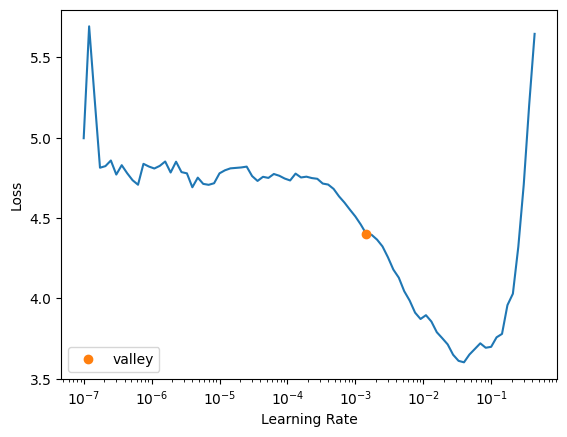

<Figure size 1000x600 with 0 Axes>

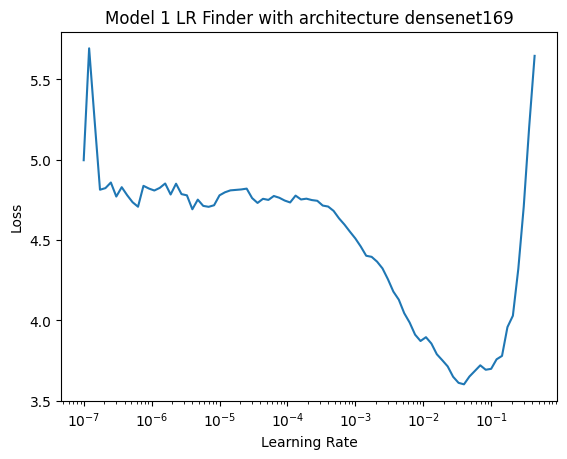

epoch,train_loss,valid_loss,accuracy,time
0,2.852622,1.333183,0.677165,00:28
1,1.463114,0.824849,0.826772,00:29
2,0.924821,0.807507,0.803150,00:28
3,0.688492,0.689270,0.881890,00:29
4,0.601569,0.632214,0.897638,00:28
5,0.442703,0.769137,0.897638,00:28
6,0.292142,0.526571,0.921260,00:28
7,0.351385,0.633949,0.897638,00:28
8,0.227820,0.509992,0.921260,00:28
9,0.206195,0.589617,0.897638,00:30


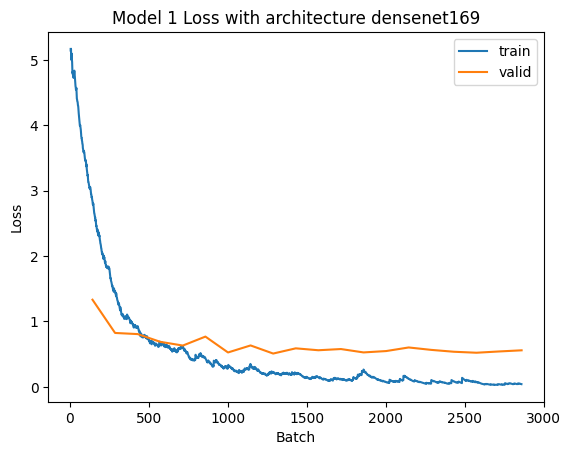

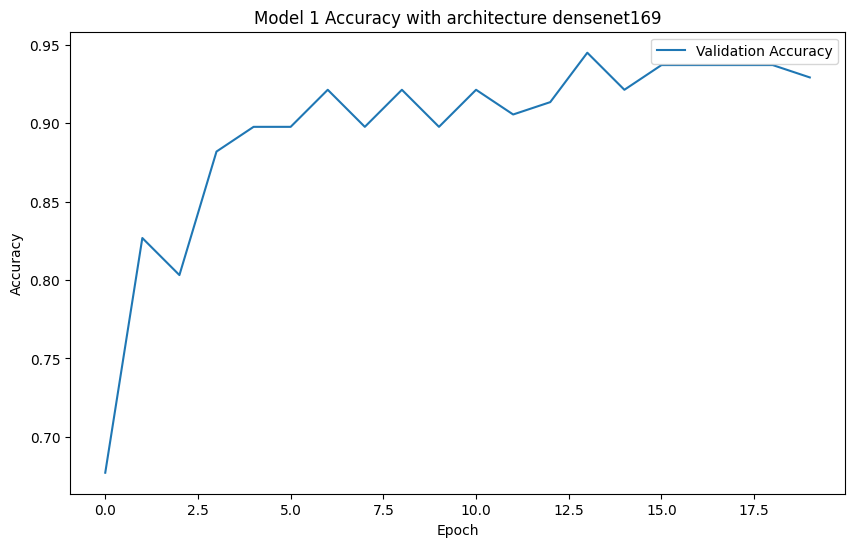

epoch,train_loss,valid_loss,accuracy,time
0,0.042758,0.547516,0.929134,00:35
1,0.059269,0.580789,0.937008,00:36
2,0.036963,0.563129,0.929134,00:34
3,0.040736,0.565851,0.913386,00:36
4,0.056938,0.526259,0.929134,00:35
5,0.044033,0.579106,0.937008,00:37
6,0.023310,0.551840,0.929134,00:35
7,0.067558,0.576767,0.929134,00:36
8,0.048956,0.567156,0.921260,00:34
9,0.029056,0.557906,0.921260,00:36


Training model 2 with architecture densenet201


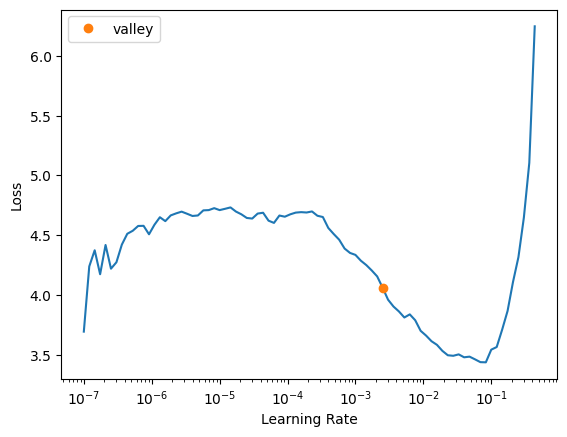

<Figure size 1000x600 with 0 Axes>

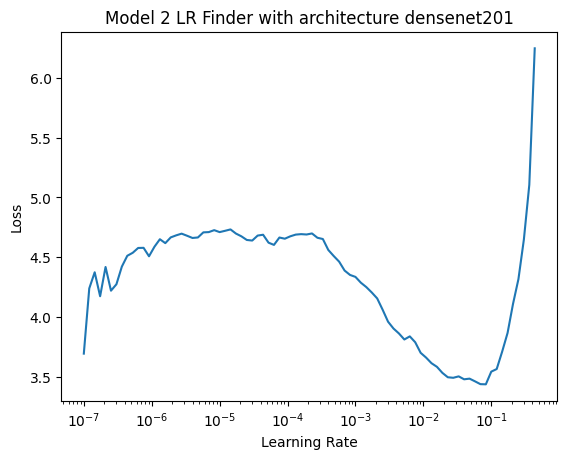

epoch,train_loss,valid_loss,accuracy,time
0,2.064843,0.949361,0.779528,00:32
1,1.053507,0.712610,0.866142,00:31
2,0.914050,0.537549,0.874016,00:33
3,0.678906,0.765128,0.889764,00:32
4,0.542749,0.617554,0.897638,00:32
5,0.483501,0.672574,0.874016,00:32
6,0.362619,0.636139,0.905512,00:34
7,0.292495,0.728913,0.913386,00:32
8,0.173658,0.569907,0.921260,00:32
9,0.238018,0.549585,0.929134,00:35


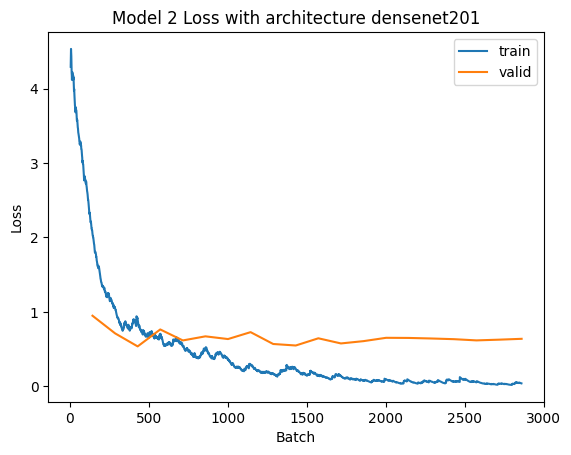

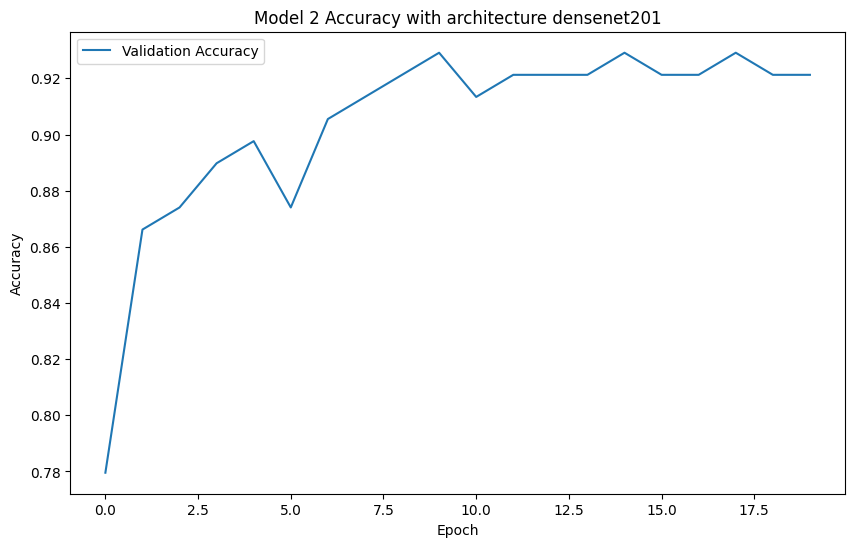

epoch,train_loss,valid_loss,accuracy,time
0,0.029209,0.586187,0.921260,00:43
1,0.047095,0.648120,0.929134,00:41
2,0.061758,0.600588,0.921260,00:41
3,0.029926,0.577744,0.921260,00:41
4,0.051700,0.655882,0.929134,00:41
5,0.041922,0.613332,0.921260,00:41
6,0.029990,0.590563,0.921260,00:43
7,0.043731,0.612889,0.921260,00:41
8,0.027299,0.606909,0.921260,00:42
9,0.028325,0.623359,0.921260,00:41


Training model 3 with architecture densenet161


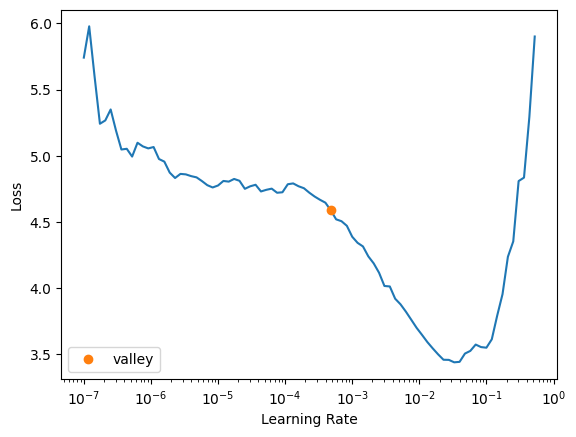

<Figure size 1000x600 with 0 Axes>

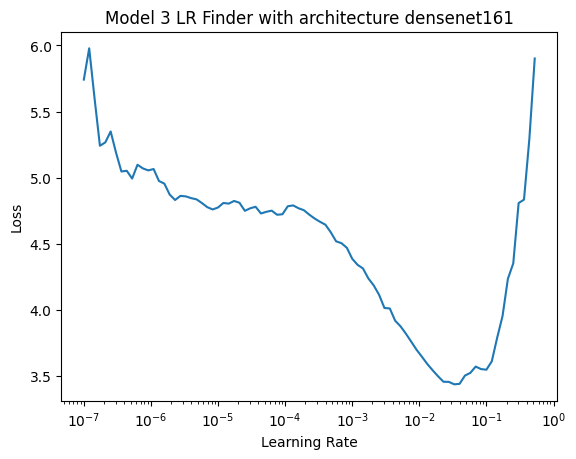

epoch,train_loss,valid_loss,accuracy,time
0,3.613149,2.215916,0.433071,00:34
1,2.123425,1.005566,0.732283,00:32
2,1.264117,0.771434,0.803150,00:32
3,0.768313,0.499219,0.881890,00:34
4,0.612944,0.465509,0.881890,00:32
5,0.445668,0.557205,0.905512,00:33
6,0.399733,0.443981,0.929134,00:33
7,0.334301,0.372448,0.937008,00:33
8,0.238146,0.409184,0.921260,00:38
9,0.250794,0.468389,0.929134,00:35


In [ ]:
# Define your models
model_archs = [densenet169, densenet201, densenet161]

#models = [cnn_learner(oversampled_data, arch, metrics=accuracy) for arch in model_archs]
# Create models with custom loss function
models = [cnn_learner(oversampled_data, arch, loss_func=nn.CrossEntropyLoss(weight=class_weights), metrics=accuracy) for arch in model_archs]

# Train each model
for i, model in enumerate(models):
    # Congelamos el modelo
    model.freeze()

    print(f"Training model {i+1} with architecture {model_archs[i].__name__}")
    lr_valley = model.lr_find().valley

    # Plot learning rate finder
    plt.figure(figsize=(10,6))
    model.recorder.plot_lr_find()
    plt.title(f'Model {i+1} LR Finder with architecture {model_archs[i].__name__}')
    plt.show()

    model.fit_one_cycle(20, lr_max=slice(lr_valley))

    # Plot loss
    model.recorder.plot_loss()
    plt.title(f'Model {i+1} Loss with architecture {model_archs[i].__name__}')
    plt.xlabel('Batch')
    plt.ylabel('Loss')
    plt.show()

    # Create a new figure for accuracy
    plt.figure(figsize=(10,6))
    valid_acc = [x[2] for x in model.recorder.values]  # Here is the change
    plt.plot(valid_acc, label='Validation Accuracy')
    plt.title(f'Model {i+1} Accuracy with architecture {model_archs[i].__name__}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    model.unfreeze()

    lr_valley = lr_valley/100

    model.fit_one_cycle(20, lr_max=slice(lr_valley/100, lr_valley))

# Create submission

The following code is used to predict the classes for the test dataset, and generate the csv that is then uploaded to Kaggle.

In [59]:
# Load your test data
test_items = get_image_files("/content/drive/MyDrive/DP4_final/test")
test_dl = dls.test_dl(test_items)

# Get TTA predictions for each model
preds = [model.tta(dl=test_dl, n=64, use_max=False)[0] for model in models]

# Average predictions
avg_preds = torch.stack(preds).max(dim=0)

# Get class indices
class_idxs = avg_preds.argmax(dim=-1)

# Get class labels
class_labels = [dls.vocab[i] for i in class_idxs]

# Get image ids from test set
image_ids = [item.stem for item in test_items]

# Create a DataFrame for submission
submission_df = pd.DataFrame({'SOPInstanceUID': image_ids, 'Target': class_labels})

# Save DataFrame to a CSV file
submission_df.to_csv('sample_submission_result.csv', index=False)

# Print a message
print("Submission file has been written to 'sample_submission_result.csv'")


Submission file has been written to 'sample_submission_result.csv'
